# The Boltzmann Bank

In [1]:
import seaborn as sns

from model import BoltzmannBank, Individual, Bank

## Introduction

This is a very simple simulation of economic activity. There are a bunch of individuals that "spend" money by randomly giving some to another individual; the money an individual receives from others is its "income".

Money in this model takes the form of bank liabilities. That is, each individual has an account with the bank; and when one individual gives money to another, the bank reduces the balance of the giver's account and increases the balance of the receiver's.


In this agent-based model there are many `Individual`s and a single `Bank`. The `Bank` provides a means of payment that the `Individual`s can use as money. Each turn, each `Individual` wants to give one unit of money to another `Individual`. If they can't (because they don't have enough money) they can choose instead to apply for a loan from the `Bank` as long as they are beneath their personal borrowing limit; otherwise they do nothing.

If an `Individual` has a loan due (or overdue) on a step, they will try to repay it before giving anyone else money. If they do not have enough money, they will apply for a loan if they are beneath their borrowing limit; otherwise, they will do nothing and hope to repay the loan later. If they do have enough to repay the loan, they will repay it; if there is any money leftover, they will give a unit to someone else.

## Unaddressed questions

+ How can individuals roll over their loans? That is, how "beneath" their borrowing limit do they need to be?

## A model without loans

Let's start with a simulation without any loans. In this model, individuals will be gifted a specifiable amount of money when they first open their account (during the initialization of the model). After that, the only way individuals can get more money is if they receive some from other individuals. The money supply will therefore be constant throughout the simulation.

In [2]:
no_loans_model = BoltzmannBank(
    num_individuals = 100,
    init_gift = 1,
    debt_limit = 0,
)

for _ in range(100):
    no_loans_model.step()

In [8]:
no_loans_model.money_supply

100.0

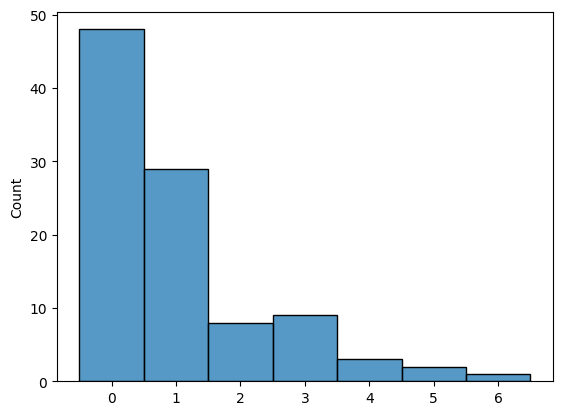

In [7]:
sns.histplot(no_loans_model.individual_wealth_curve, discrete=True);

## A model with unlimited loans

Let's look next at a simulation with an unlimited amount of loans

In [ ]:
model = BoltzmannBank(
    num_individuals = 100,
    individual_loan_limit = 1,
    loan_review_limit = 10,
)

In [ ]:
num_steps = 100

for _ in range(num_steps):
    model.step()

## Visualization

In [ ]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()
individual_df = model.datacollector.get_agenttype_vars_dataframe(Individual)

### The Money Supply

For our simple model, the money supply is entirely composed bank liabilities.

In [ ]:
money_supply = model_df["Money Supply"]

g = sns.lineplot(data=money_supply)
g.set(title="Money Supply", xlabel="Steps", ylabel="Currency Units");

### Total Spending

In [ ]:
total_spending = model_df["Total Spending"]

g = sns.lineplot(data=total_spending)
g.set(title="Total Spending", xlabel="Steps", ylabel="Currency Units");

### The Individual Wealth Distribution

For our very simple model, each individual's wealth is its quantity of money, which is to say the balance of its bank account.

In [ ]:
# last_step = individual_df.index.get_level_values("Step").max()
wealth_curve = individual_df.xs(num_steps, level="Step")["Wealth"].sort_values().values

g =sns.histplot(wealth_curve, discrete=True)
g.set(title="Individual Wealth Distribution", xlabel="Wealth");

### The Individual Wealth Gini Index

In [ ]:
wealth_gini = model_df["Individual Wealth Gini"]

g = sns.lineplot(data=wealth_gini)
g.set(title="Individual Wealth Gini Index", xlabel="steps");

### The Individual Income Distribution

We can also look at the income distribution of our individuals.

In [ ]:
income_curve = individual_df.xs(num_steps, level="Step")["Income"].sort_values().values

g =sns.histplot(income_curve, discrete=True)
g.set(title="Individual Income Distribution", xlabel="Income");

### The Individual Income Gini Index

In [ ]:
income_gini = model_df["Individual Income Gini"]

g = sns.lineplot(data=income_gini)
g.set(title="Individual Income Gini Index", xlabel="steps");

### The Individual Spending Distribution

In [ ]:
spending_curve = individual_df.xs(num_steps, level="Step")["Spending"].sort_values().values

g =sns.histplot(spending_curve, discrete=True)
g.set(title="Individual Spending Distribution", xlabel="Spending");

### The Individual Spending Gini Index

In [ ]:
spending_gini = model_df["Individual Spending Gini"]

g = sns.lineplot(data=spending_gini)
g.set(title="Individual Spending Gini Index", xlabel="steps");

### Comparing the Distributions of Wealth, Income and Spending

In our very simple model, individuals accumulate wealth by having an income in excess of their spending.

In [ ]:
wis_df = individual_df.xs(num_steps, level="Step").sort_values(by="Wealth")
wis_df.index = range(1, len(wis_df) + 1)
long_wis_df = wis_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")

g = sns.lineplot(data=long_wis_df, x="index", y="Value", hue="Metric")
g.set(title="Comparison of Wealth, Income and Spending Curves");